In [56]:
print("Hello world!!")

Hello world!!


#PyTorch Workflow
Let's explore an example of PyTorch end-to-end workflow.

Resources:

* Ground Truth Notebook -> https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

* Book Version Notebook -> https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question -> https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [57]:
what_are_we_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_are_we_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [58]:
import torch
from torch import nn # contains all of PyTorch building blocks from neural networks.
import matplotlib.pyplot as plt
#check PyTorch version
torch.__version__

'2.3.1+cu121'

##Data (Preparing and Loading).

Data can be anything...in machine learning.
* Excel Spreadsheets.
* Images of any kind.
* Videos (YouTube has lots of data).
* DNA.
* Text.

Machine Learing is a game of 2 parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this let's create some *known* data using the linear regression formula.

We'll use linear regression to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.

In [59]:
##Create *known* parameters.
weight = 0.7
bias =0.3

#Create.
start = 0
end = 1
step = 0.02
x = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * x + bias

x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [60]:
len(x),len(y)

(50, 50)

##Split data into training and test sets
We've got some data.

But before we build a model we need to split it up.

One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

In [61]:
#create a train/test split
train_split = int(0.8 * len(x))
x_train,y_train = x[:train_split],y[:train_split]
x_test,y_test = x[train_split:],y[train_split:]

len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

In [62]:
x_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we visualize our data.


This is where the data explorer's motto comes in: `Visualize,Visualize,Visualize`


In [63]:
def plot_predictions(train_data=x_train,
                             train_labels = y_train,
                             test_data=x_test,
                             test_labels=y_test,
                             predictions=None):
  """plots taining data,test data and compare predictions]
  '"""
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  #Plot test data in green.
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

  #Are there predictions?
  if predictions is not None:
    #plot the predictions if they exist.
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")

  #Show the legend.
  plt.legend(prop={"size":14})

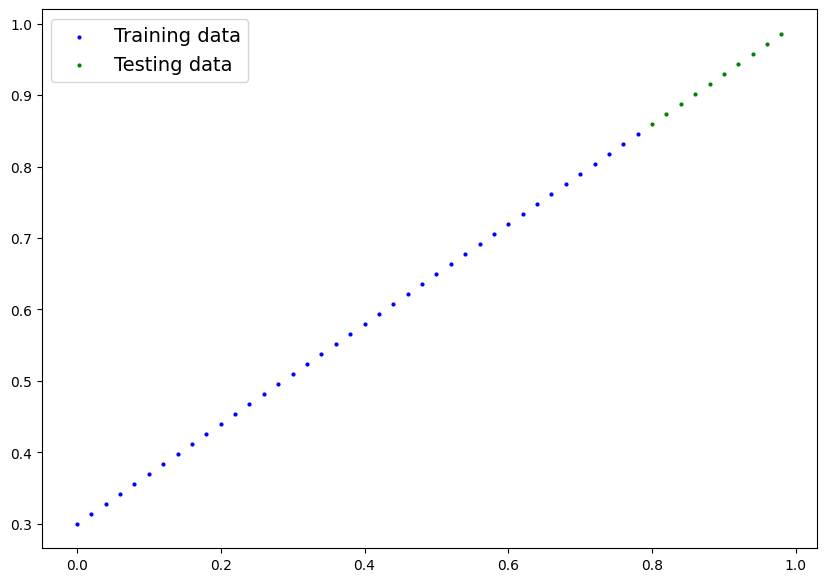

In [64]:
plot_predictions();

##2.Build model.
Our first PyTorch model.

This is a very exciting ...let's do it!!

Because we're going to be building classes throughout the course,I'd recommend getting familiar with OOP in python, to do so you can use the following resources:  https://realpython.com/python3-object-oriented-programming/


What our model does:
* Start with random values (weight & bias).
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so:

Through 2 main algorithms:
1. Gradient descent-> https://www.youtube.com/watch?v=sDv4f4s2SB8

2. Backpropagation -> https://www.youtube.com/watch?v=Ilg3gGewQ5U


In [65]:
#Create linear regression model class.
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module.
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  #Forward method to define the computation in the model.
  def forward(self,x:torch.Tensor) -> torch.Tensor: #<- "x" is the input data
    return self.weights * x + self.bias # This is a Linear regression formulae.



##PyTorch model building essentials.


PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are `torch.nn`, `torch.optim`, `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`. For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

* `torch.nn` -> Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).

* `torch.optim` -> Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).

* `torch.nn.module` -> The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.

* `torch.parameter` -> Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd"

* `torch.optim` -> Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).

* `def forward()` -> All nn.Module subclasses require you to overwrite forward(),this method defines what happens in the forward computation.

See more: https://pytorch.org/tutorials/beginner/ptcheat.html

###Checking the content of our PyTorch Model.

Now we've created a model let's see what's inside.

So,we can check our model parameters or what's inside our model usiing `.parameters()`

In [66]:
#create a random seed.
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

#Check-out the parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [67]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

###Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.

When we pass data through our model,it's going to run through the `forward()` method.

In [68]:
#Make predictions with model...
with torch.inference_mode():
  y_preds = model_0(x_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [69]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

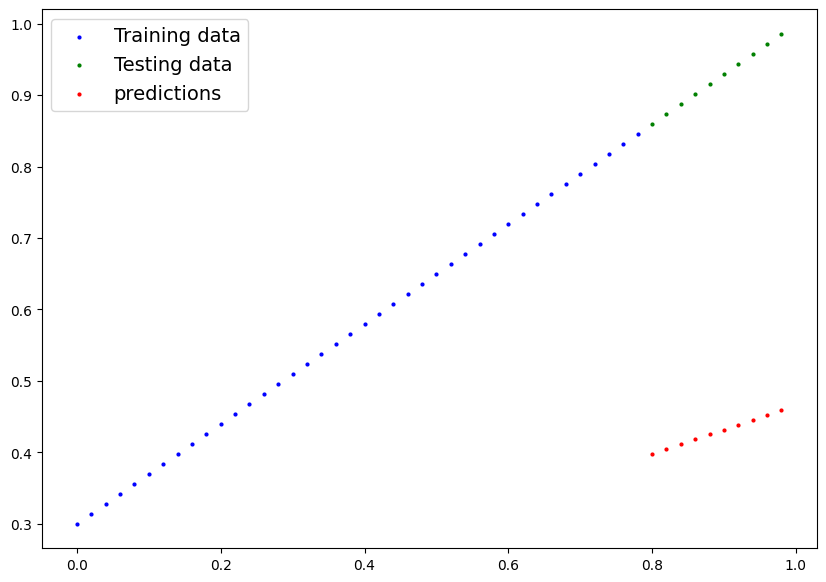

In [70]:
plot_predictions(predictions=y_preds)

###3. Train Model.
The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words,from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a `loss function`

* Note: Loss function may also be called cost function or criterion in different areas.For our case.we're going to refer to it as a loss function.

* **Loss Function** -> Function to measure how wrong model's predictions are to the ideal ouputs,lower is always better.

* **Optimizer** -> Takes into account the loss of a model and adjusts the model's parameters (e.g. Weight & Bias.) in our case to improve the loss function.

And we'll use SGD, torch.optim.SGD(params, lr) where:

* params is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).
* lr is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).


And specifically,for PyTorch we need:
* A training loop.
* A testing loop.



In [71]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [72]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [73]:
#Setup a loss function..
loss_fn = nn.L1Loss()

#Setup an optimizer(Stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) #lr -> learning rate.= the most important

**Q**:Which loss function should i use?

**A**:This will be problem specific.But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example,for a regression problem(like ours),a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But,for a classification problem like classifying whether a photo is of a dog or a cat,you i'll likely want to use the loss function of `nn.BCELoss()` (binary cross entropy loss).

###Building a training loop (and testing a loop) in PyTorch

A couple of things we need in a training loop:
* Loop through data.
* Forward pass (this involves data moving through our model's `forward()` functions) - also called `forward propagation`.
* Calculate the loss (compare forward pass predictions to ground truth labels).
* Optimizer zero grad.
* Loss backward -> move backwards through the network to calculate the gradients of each parameter of our model with respect to the loss.
* Optimizer step -> use the optimizer to adjust our model's parameters to try and improve the loss.(**gradient descent**).



In [74]:
torch.manual_seed(42)
#An epoch is one loop through the data
epochs = 195

#Tracking different values
epoch_count = []
loss_values = []
test_loss_values = []

###TRAINING

# 0.Loop through the data.
for epoch in range(epochs):
  #Set the model to training mode.
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients.

  #1.Forward pass
  y_pred = model_0(x_train)

  #2.Calculate the loss.
  loss = loss_fn(y_pred,y_train)
  print(f"Loss: {loss}")
  #3.Optimizer Zero grad
  optimizer.zero_grad()

  #4.Perform backpropagation on the loss with respect to the parameters of the model.
  loss.backward()

  #5.Step-up optimizer (perform gradient descent).
  optimizer.step() #by default how the optimizer changes will accumulate through the loop so... weh ave to zero them above in step 1
###TESTING....
  model_0.eval() # turns off different tracking settings in the model not needed during evaluation.
  with torch.inference_mode(): # turns off gradient racking and a couple more things behind the scenes
    #1. Do the forward pass.
    test_pred = model_0(x_test)

    #2.Calculate the loss
    test_loss = loss_fn(test_pred,y_test)

  #print out what is happening.
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
  #print out model stae_dict()
    print(model_0.state_dict())



  ###TESTING....




Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0

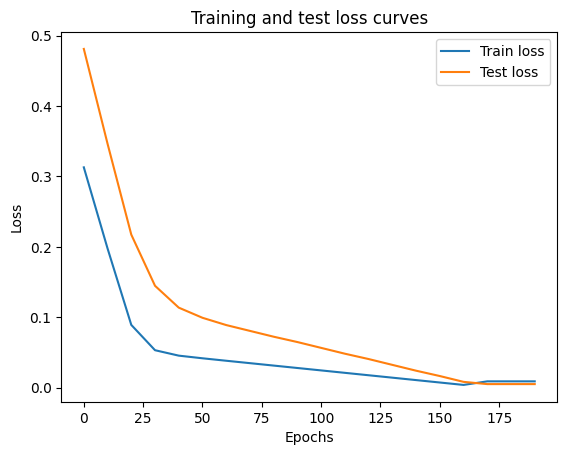

In [75]:
#plot the Loss Curve...
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

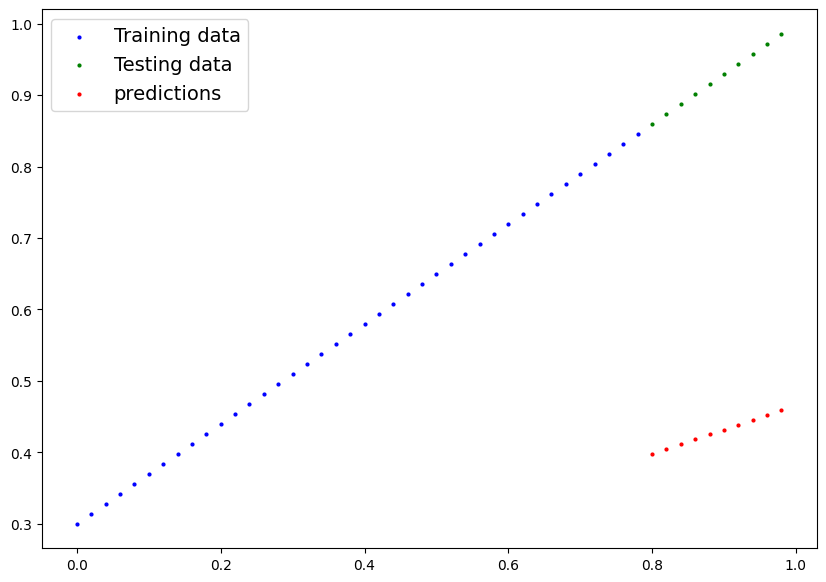

In [77]:
plot_predictions(predictions=y_preds);

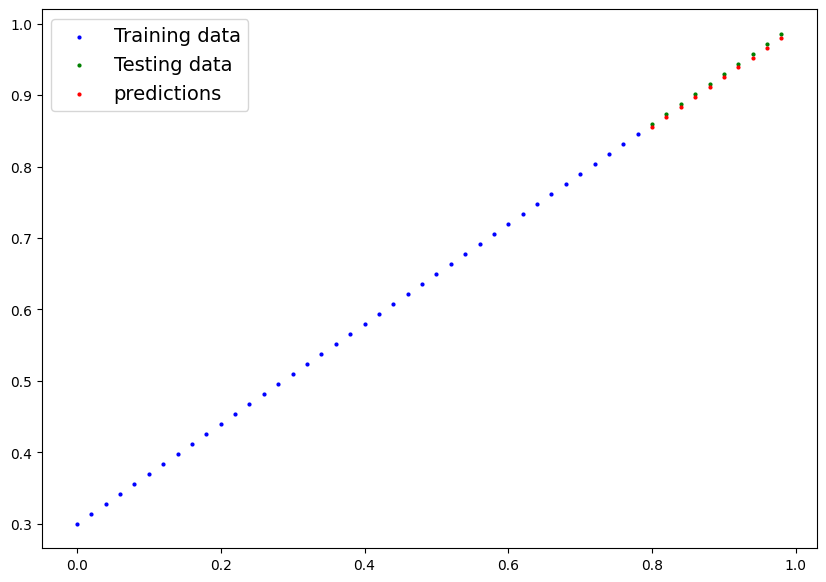

In [78]:
plot_predictions(predictions=y_preds_new);

## Saving a model in PyTorch....

`torch.save` -> allows you to save a pytorch object in pythons pickle format.

`torch.load` -> allows you to load a saved pytorch object.

`torch.nn.Module.load_state_dict()` -> this allows you to load a model's state dictionary.


PyTorch save and load code resources -> https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_models_for_inference.html

In [79]:
#Saving our pytorch model...
from pathlib import Path
# 1.Create models directory...
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2.Create model save path.
MODEL_NAME = "01_PyTorch_WorkFlow_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

##. Save the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_PyTorch_WorkFlow_0.pth


In [80]:
model_0

LinearRegressionModel()

In [81]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1580 Jul 18 17:37 01_PyTorch_WorkFlow_0.pth
-rw-r--r-- 1 root root 1644 Jul 18 17:35 01_PyTorch_WorkFlow_1.pth


##Loading a PyTorch model.
Since we saved our model's `state_dict()` rather the entire model, we i'll create a new instance of our model and `state_dict()` into that.

In [82]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [83]:
#To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [84]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [85]:
#Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(x_test)
loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [86]:
#Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [87]:
#Make some model preds.
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(x_test)

y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [88]:
#Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##Putting it all Together.

Let's go back through the steps above and see it all in one place

In [89]:
#Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as  plt
import torch.optim as optim
#Check the PyTorch version
torch.__version__

'2.3.1+cu121'

##create a device-agnostic code
This means if we've got access to a GPU,our code will use it(for potentially faster computing)
if no GPU is available,the code will default to using CPU.

In [90]:
#Setup device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")

using device: cpu


###Data


In [91]:
#Create some data using the linear regression formula y = weight * x + bias
weight = 0.5
bias = 0.2

#create a rage of values
start = 0
stop = 1
step = 0.02

#Create x and y (features and labels)
x = torch.arange(start,stop,step).unsqueeze(dim=1) #without unsqueeze errors will pop out.
y = weight * x + bias

x[:10],y[:10]
print(f"Number of X samples: {len(x)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {x[:10]}\ny: {y[:10]}")

Number of X samples: 50
Number of y samples: 50
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y: tensor([[0.2000],
        [0.2100],
        [0.2200],
        [0.2300],
        [0.2400],
        [0.2500],
        [0.2600],
        [0.2700],
        [0.2800],
        [0.2900]])


In [92]:
#Split the data
train_split = int(0.8 * len(x))
x_train,y_train = x[:train_split],y[:train_split]
x_test,y_test = x[train_split:],y[train_split:]
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

In [93]:
#Plot predictions function
def plot_predictions(train_data= x_train,
                             train_labels = y_train,
                             test_data=x_test,
                             test_labels=y_test,
                             predictions=None):
  """plots taining data,test data and compare predictions]
  '"""
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  #Plot test data in green.
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

  #Are there predictions?
  if predictions is not None:
    #plot the predictions if they exist.
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")

  #Show the legend.
  plt.legend(prop={"size":14})

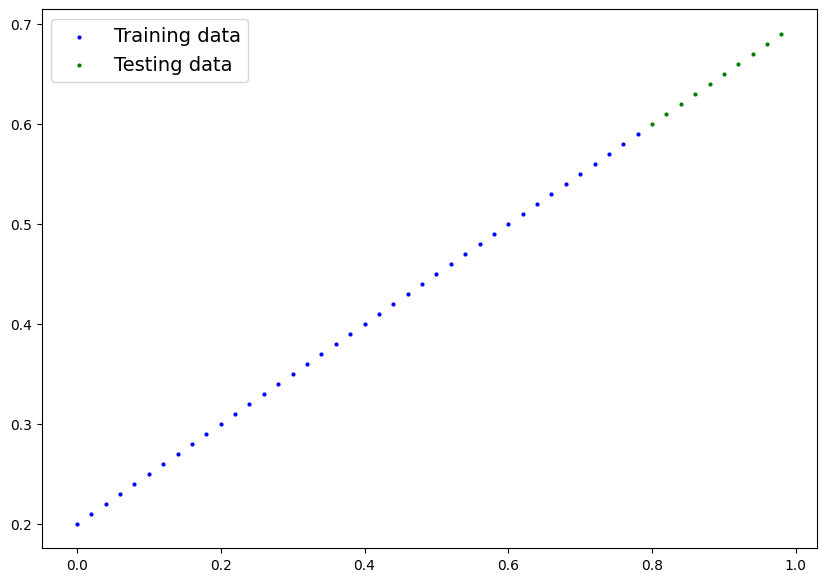

In [94]:
#Plot the data
#Note: If you don't have the plot prediction() function loaded,this will error
plot_predictions(x_train,y_train,x_test,y_test)

##Building a pytorch Linear model

In [95]:
#Create a Linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for creating the model parameters.
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


#Set the manual seed.
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [96]:
x_train[:5],y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400]]))

In [97]:
#Check the current device
next(model_1.parameters()).device

device(type='cpu')

In [98]:
#Set the model to use the target device...
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

###Training

For training we need:
* Optimizer
* Training Loop
* Testing Loop
* Loss Function

In [99]:
#Setup loss function...
loss_fn = nn.L1Loss() # same as MAE

#Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [100]:
#let's write a training loop
torch.manual_seed(42)

epochs = 200

#Tracking different values
epoch_count = []
loss_values = []
test_loss_values = []
for epoch in range(epochs):
  model_1.train

  # 1. Forward pass.
  y_pred = model_1(x_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred,y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()


  #4. Perform back propagation.
  loss.backward()

  #5. optimizer step.
  optimizer.step()

  ##TESTING...

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(x_test)

    test_loss = loss_fn(test_pred,y_test)

  #Print out what's happening...
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.7331780195236206 | Test Loss: 0.8519762754440308
Epoch: 10 | Loss: 0.6179680824279785 | Test Loss: 0.7172663807868958
Epoch: 20 | Loss: 0.5027582049369812 | Test Loss: 0.5825566053390503
Epoch: 30 | Loss: 0.3875483274459839 | Test Loss: 0.44784674048423767
Epoch: 40 | Loss: 0.2723384499549866 | Test Loss: 0.31313690543174744
Epoch: 50 | Loss: 0.15712858736515045 | Test Loss: 0.178427055478096
Epoch: 60 | Loss: 0.04191867634654045 | Test Loss: 0.04371718689799309
Epoch: 70 | Loss: 0.004279922228306532 | Test Loss: 0.014590626582503319
Epoch: 80 | Loss: 0.004279922228306532 | Test Loss: 0.014590626582503319
Epoch: 90 | Loss: 0.004279922228306532 | Test Loss: 0.014590626582503319
Epoch: 100 | Loss: 0.004279922228306532 | Test Loss: 0.014590626582503319
Epoch: 110 | Loss: 0.004279922228306532 | Test Loss: 0.014590626582503319
Epoch: 120 | Loss: 0.004279922228306532 | Test Loss: 0.014590626582503319
Epoch: 130 | Loss: 0.004279922228306532 | Test Loss: 0.014590626582503319

In [101]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5108]])),
             ('linear_layer.bias', tensor([0.1915]))])

In [102]:
weight,bias

(0.5, 0.2)

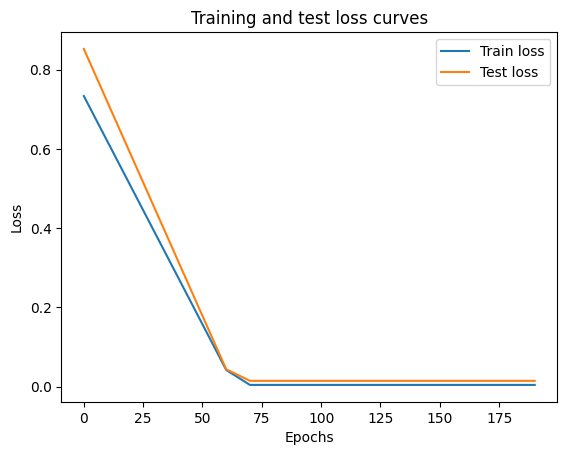

In [103]:
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

##Making and Evaluating predictions.

In [104]:
#Turn model into evaluation mode.
model_1.eval()

#Make predictions on test data.
with torch.inference_mode():
  y_preds = model_1(x_test)
y_preds

tensor([[0.6001],
        [0.6104],
        [0.6206],
        [0.6308],
        [0.6410],
        [0.6512],
        [0.6614],
        [0.6717],
        [0.6819],
        [0.6921]])

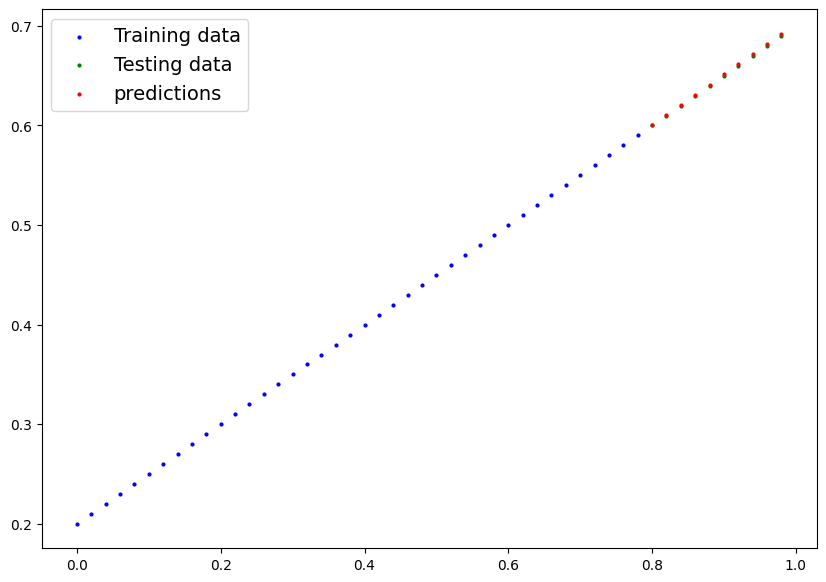

In [105]:
#Check out model predictions visually.
plot_predictions(predictions=y_preds)

###Saving and loading a model

In [106]:
from pathlib import Path

#1.Create models directory.
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. Create a model save path.
MODEL_NAME = "01_PyTorch_WorkFlow_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3.Save the model state dict.
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: models/01_PyTorch_WorkFlow_1.pth


In [107]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5108]])),
             ('linear_layer.bias', tensor([0.1915]))])

In [108]:
#Load a PyTorch Model.


#Create a new instance of the linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

#Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#Put the loaded model to device.
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [109]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [110]:
#Evaluate a loaded model
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(x_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])